# Proyek Analisis Data: Nama dataset
- Nama: Arvin Azmi Sava
- Email: arvinsava0711@gmail.com
- Username Dicoding: arvinazmisava

## Menentukan Pertanyaan Bisnis

- Apakah terdapat perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan?
- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda harian?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [2]:
# Membaca file CSV dari URL
day_df = pd.read_csv("https://raw.githubusercontent.com/arvin0711/Proyek-Analisis-Data-Dicoding/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/arvin0711/Proyek-Analisis-Data-Dicoding/main/hour.csv")
hour_df.head()



,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai tabel day_df

Melihat informasi tipedata masing-masing kolom

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kesalahan tipe data baris dteday berupa object seharusnya diganti dengan tipe data datetime

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

sudah benar dan tidak ditemukan missing value

In [6]:
day_df.duplicated().sum()
print("jumlah duplikasi datanya adalah: ", day_df.duplicated().sum())

jumlah duplikasi datanya adalah:  0


Tidak terdapat duplikasi data

Melihat Informasi Statiska Deskriptif

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Ada kesalahan yang sama dengan tabel day_df yaitu tipe data baris dteday berupa object seharusnya diganti dengan tipe data datetime

Mengecek duplikasi data

In [9]:
hour_df.duplicated().sum()
print("jumlah duplikasi datanya adalah: ", day_df.duplicated().sum())

jumlah duplikasi datanya adalah:  0


Dapat dilihat bahwa tidak ada duplikasin data

Mengecek missing value

In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan missing value

Melihat Informasi Statistika Deskriptif

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Pada tabel day_df dan hour_df tidak ditemukan missing value sehingga kita tidak perlu melakukan penghapusan data ataupun mengganti nilai data mengggunakan median/mean. Akan tetapi pada tabel day_df & hour_df terdapat kesalahan tipe data sehingga perlu diganti menjadi tipe data yang sesuai

Memperbaiki tipe data kolom dteday pada tabel day_df

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Dapat dilihat tipedata kolom dteday sudah berhasil diganti menjadi datetime

Memperbaiki tipe data kolom dteday pada tabel hour_df

In [13]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dapat dilihat tipedata kolom dteday sudah berhasil diganti menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

### Ekplorasi Tabel day_df

Menampilkan 10 baris pertama tabel day_df

In [14]:
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Mengelompokkan data berdasarkan kolom workingday pada tabel day_df

In [15]:
# Group by workingday and calculate the number of unique instances
byworkingday_df = day_df.groupby(by="workingday")["instant"].nunique().reset_index()
byworkingday_df.rename(columns={
    "instant": "sum"
}, inplace=True)


Mencetak hasilnya

In [16]:
print(byworkingday_df)

   workingday  sum
0           0  231
1           1  500


Dapat terlihat bahwa jumlah penyewaan pada hari kerja lebih tinggi dari hari biasa

### Ekplorasi tabel hour_df

Menampilkan 10 baris pertama

In [17]:
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Mengelompokkan data berdasarkan kolom "whetershit", kemudian dihitung rata-rata nilai dari kolom "cnt"yang menunjukkan jumlah sewa sepeda pada saat kondisi cuaca tertentu.

In [18]:

avg_rentals_by_weather = hour_df.groupby('weathersit')['cnt'].mean()
print(avg_rentals_by_weather)

weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64


Dapat terlihat jumlah sewa sepeda pada kondisi cuaca sangat berpengaruh

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah hari kerja berpengaruh terhadap penyewaan sepeda?

#### Menampilkan visualisasi rata-rata penyewaan sepeda berdasarkan kondisi hari kerja

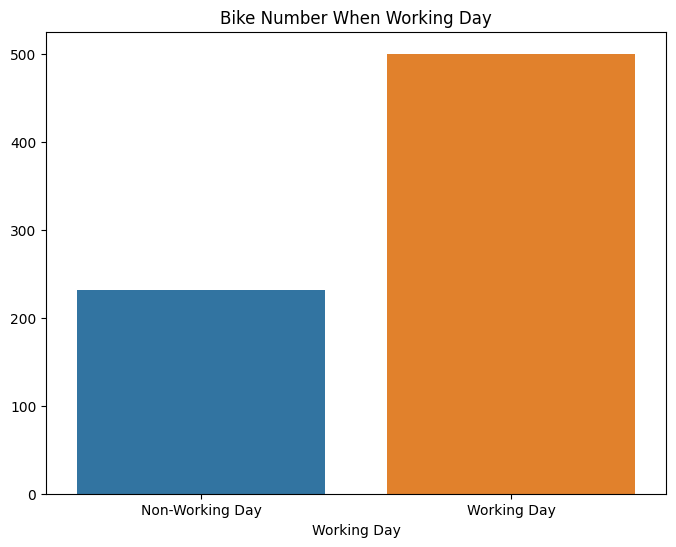

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x=byworkingday_df["workingday"], y=byworkingday_df["sum"])
plt.title('Bike Number When Working Day')
plt.xlabel('Working Day')
plt.ylabel(None)
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])
plt.show()

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap penyewaan bike sharing?

#### Menampilkan visualisasi rata-rata penyewaan sepeda berdasarkan kondisi cuaca

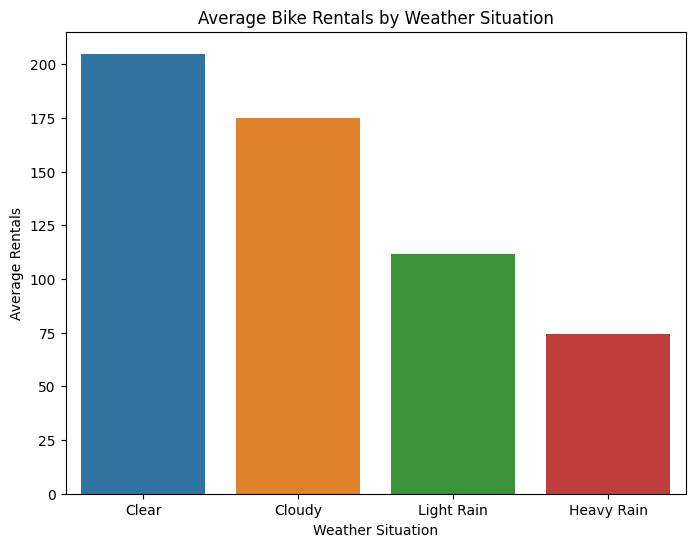

In [20]:

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_rentals_by_weather.index, y=avg_rentals_by_weather.values)
plt.title('Average Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Average Rentals')
plt.xticks([0, 1, 2, 3], ['Clear', 'Cloudy', 'Light Rain', 'Heavy Rain'])
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan visualisasi rata-rata penyewaan sepeda berdasarkan hari kerja, terlihat bahwa rata-rata penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari biasa. Hal ini mengindikasikan bahwa hari kerja memiliki pengaruh yang positif terhadap penyewaan sepeda. Orang cenderung lebih banyak menggunakan sepeda saat hari kerja, mungkin karena digunakan sebagai sarana transportasi menuju pekerjaan atau aktivitas sehari-hari.


- conclution pertanyaan 2 : Berdasarkan visualisasi rata-rata penyewaan sepeda berdasarkan situasi cuaca, terlihat bahwa rata-rata penyewaan sepeda lebih tinggi pada situasi cuaca yang jelas (clear) dan cenderung lebih rendah pada situasi cuaca yang berkabut (mist) atau hujan ringan (light rain), sedangkan situasi hujan deras (heavy rain) memiliki rata-rata penyewaan terendah. Ini menunjukkan bahwa cuaca memiliki pengaruh yang signifikan terhadap tingkat penyewaan sepeda, dengan cuaca yang cerah cenderung meningkatkan aktivitas penyewaan sepeda.

#### Ekspor data yang sudah dibersihkan

In [21]:
day_df.to_csv("dashboard\day_clean.csv", index=False)
hour_df.to_csv("dashboard\hour_clean.csv", index=False)